# 📊 Análisis Exploratorio de Datos (EDA) - Wine Quality

## 1️⃣ Importación de Librerías

In [40]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import seaborn as sns
warnings.filterwarnings("ignore")

## 2️⃣ Carga de Datos

In [41]:
# Definir rutas de archivos
red_wine_path = "../data/raw/winequality-red.csv"
white_wine_path = "../data/raw/winequality-white.csv"

# Cargar datasets
df_red = pd.read_csv(red_wine_path, sep=";")
df_white = pd.read_csv(white_wine_path, sep=";")

# Agregar una columna "wine_type" para identificar el tipo de vino
df_red["wine_type"] = "red"
df_white["wine_type"] = "white"

# Combinar ambos datasets en uno solo
df_wine = pd.concat([df_red, df_white], ignore_index=True)


## 3️⃣ Inspección de Datos

In [42]:
df_wine.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [43]:
 # Ver primeras filas
print(df_wine.shape)   # Ver cantidad de filas y columnas
df_wine.info() # Ver tipos de datos
df_wine.describe() # Ver estadísticas generales

(6497, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## 4️⃣ Datos Faltantes y Duplicados

In [44]:
print(df_wine.isnull().sum())  # Ver valores nulos
print("Existen ",df_wine.duplicated().sum()," filas duplicadas en el dataset")  # Ver valores duplicados

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64
Existen  1177  filas duplicadas en el dataset


In [45]:
#Entrando en detalle sobre las filas duplicadas en el dataset
print("Duplicados en vinos tintos:", df_red.duplicated().sum())
print("Duplicados en vinos blancos:", df_white.duplicated().sum())

Duplicados en vinos tintos: 240
Duplicados en vinos blancos: 937


In [46]:
# Cantidad de repeticiones de cada fila ordenadas de mayor a menor
df_wine.value_counts().reset_index(name="count").sort_values("count", ascending=False).head(30)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,count
1,7.3,0.190,0.27,13.90,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,8,white,8
0,7.0,0.150,0.28,14.70,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,7,white,8
2,6.8,0.180,0.30,12.80,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,7,white,7
3,7.4,0.160,0.30,13.70,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,7,white,7
4,7.4,0.160,0.27,15.50,0.050,25.0,135.0,0.99840,2.90,0.43,8.7,7,white,6
5,7.4,0.190,0.30,12.80,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,7,white,6
6,7.4,0.190,0.31,14.50,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,6,white,6
7,7.6,0.200,0.30,14.20,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8,white,6
13,7.5,0.240,0.31,13.10,0.050,26.0,180.0,0.99884,3.05,0.53,9.1,6,white,5
10,6.2,0.230,0.36,17.20,0.039,37.0,130.0,0.99946,3.23,0.43,8.8,6,white,5


## 5️⃣ Análisis de Distribución

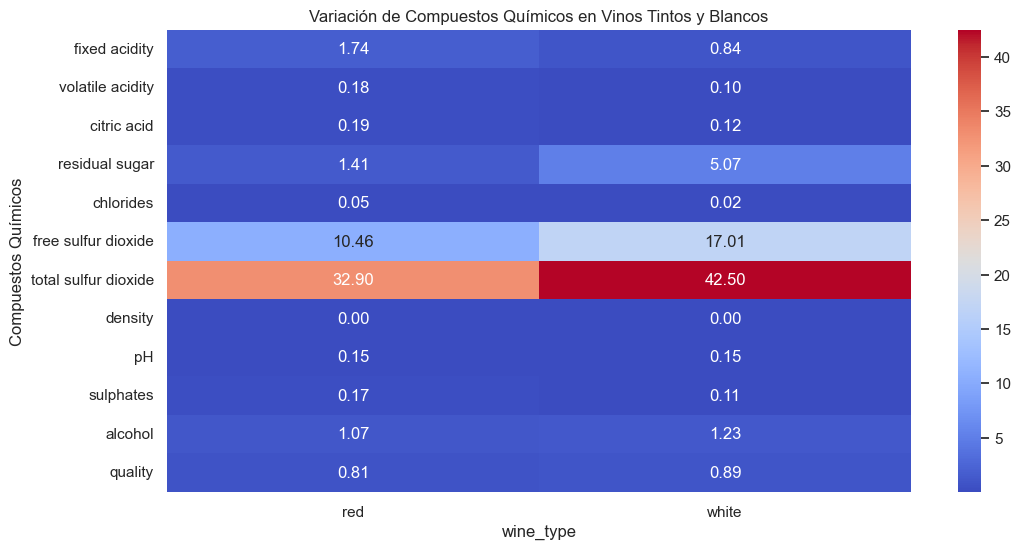

In [47]:
# Agrupar por tipo de vino y calcular la desviación estándar
variation_stats = df_wine.groupby("wine_type").std().T

# Visualizar la variabilidad de los compuestos químicos
plt.figure(figsize=(12, 6))
sns.heatmap(variation_stats, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Variación de Compuestos Químicos en Vinos Tintos y Blancos")
plt.ylabel("Compuestos Químicos")
plt.show()


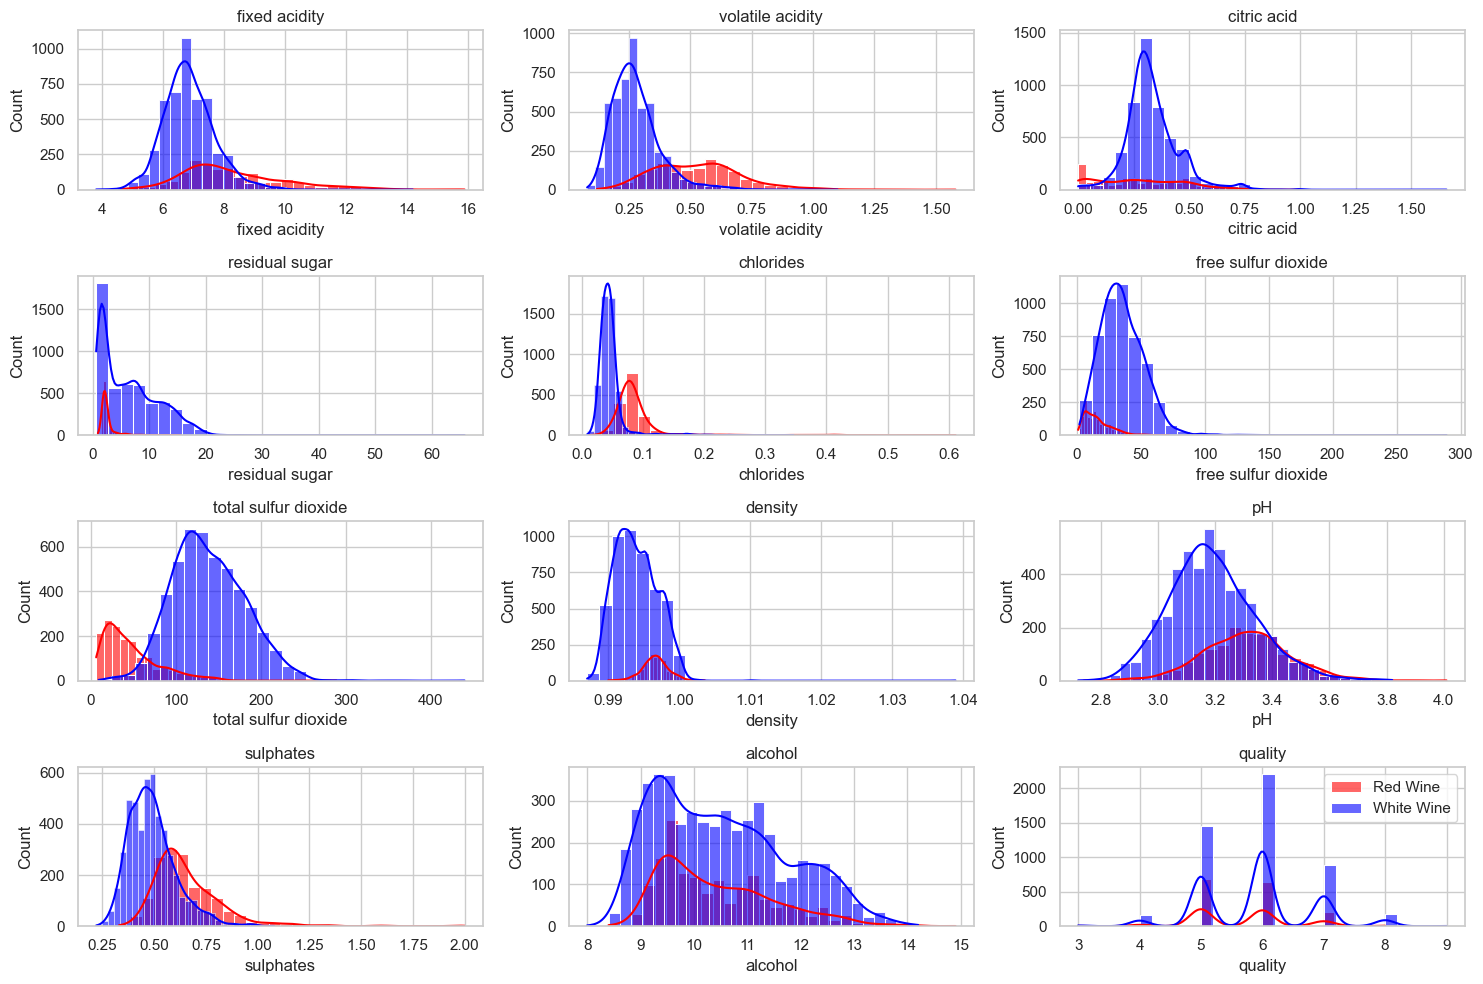

In [48]:
# Configurar estilo
sns.set_theme(style="whitegrid")

# Crear figura con subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterar sobre columnas numéricas
for i, col in enumerate(df_red.columns[:-1]):  # Excluimos 'wine_type'
    sns.histplot(df_red[col], bins=30, kde=True, color="red", ax=axes[i], label="Red Wine", alpha=0.6)
    sns.histplot(df_white[col], bins=30, kde=True, color="blue", ax=axes[i], label="White Wine", alpha=0.6)
    axes[i].set_title(col)

plt.tight_layout()
plt.legend()
plt.show()


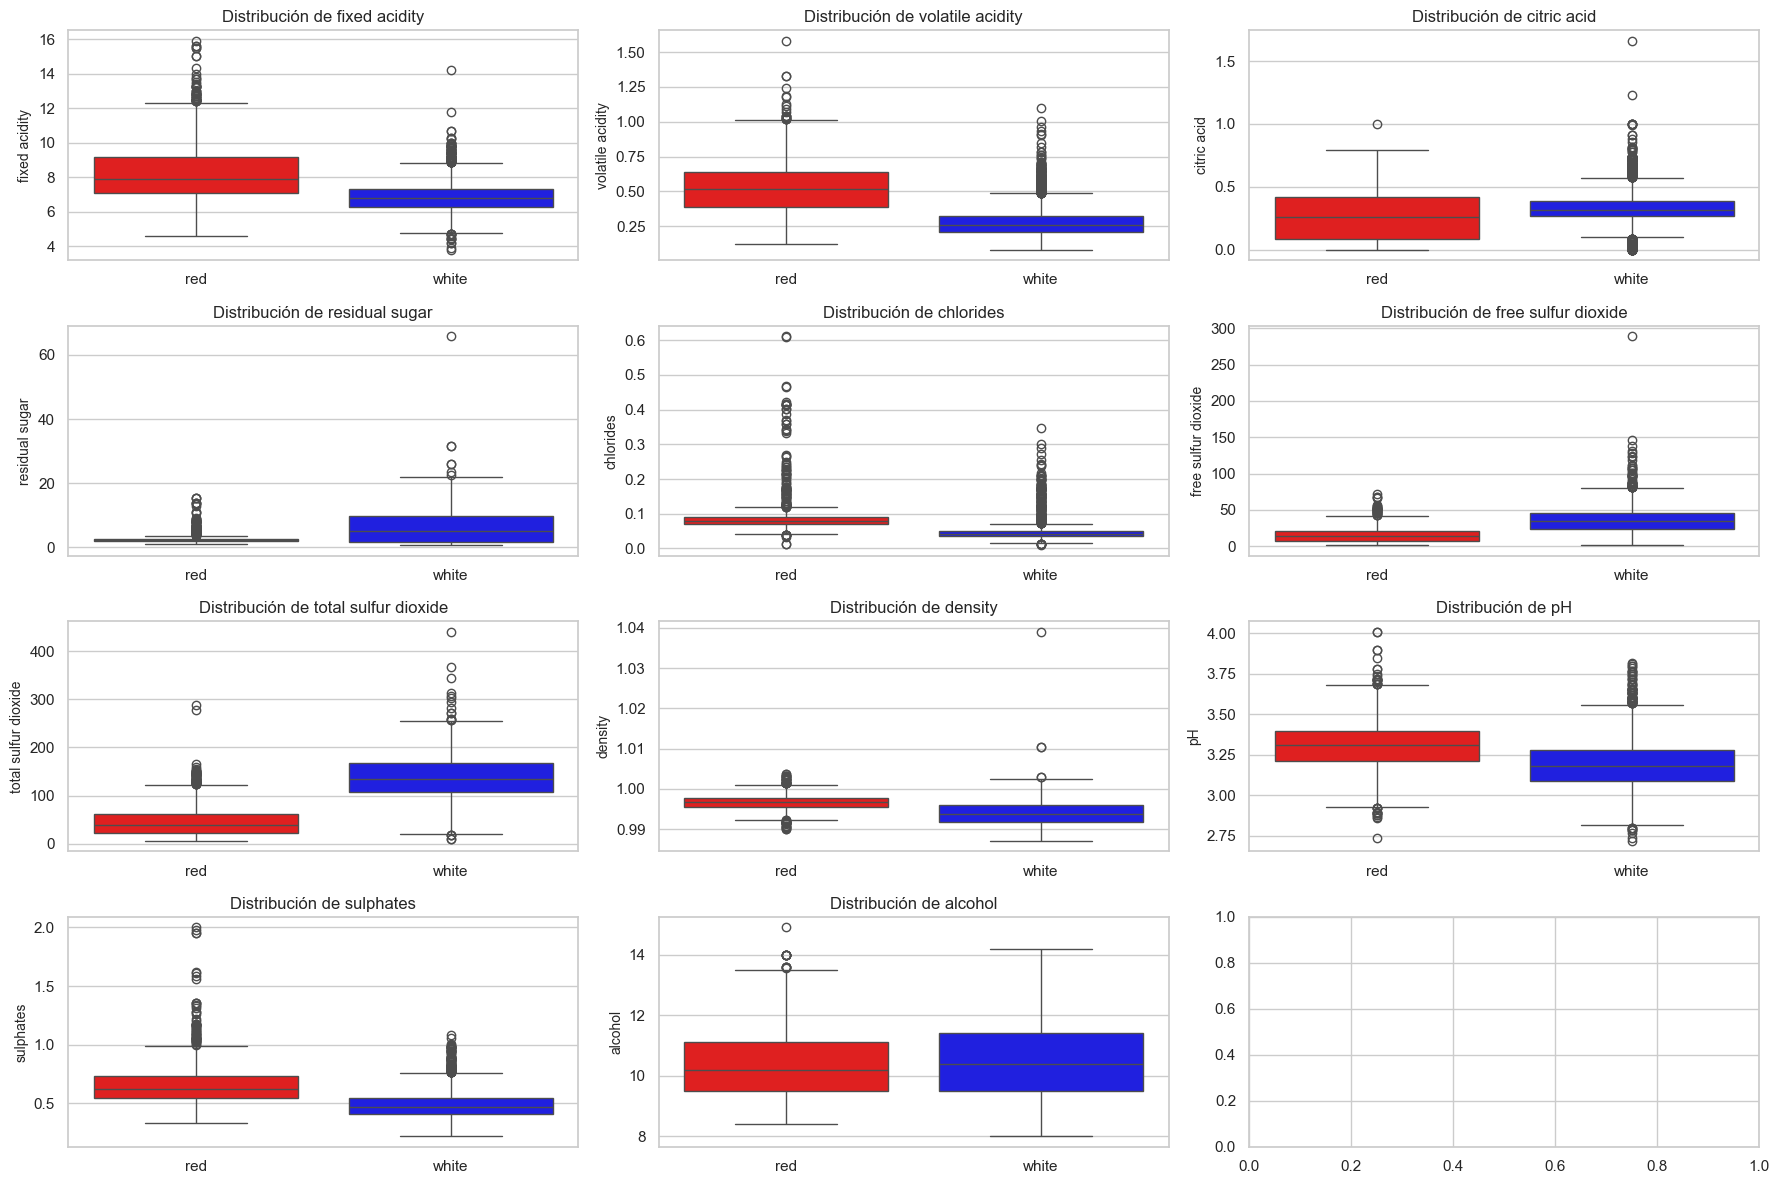

In [49]:
# Configuración del estilo
sns.set_theme(style="whitegrid")

# Definir variables numéricas excluyendo "wine_type"
features = df_wine.columns[:-2]  # Excluir wine_type y quality
num_features = len(features)

# Crear una figura grande con subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))  # Ajustar según el número de variables
axes = axes.flatten()  # Convertir a lista para iterar fácilmente

# Iterar sobre cada variable y graficar su boxplot en un subplot
for i, feature in enumerate(features):
    sns.boxplot(data=df_wine, x="wine_type", y=feature, palette=["red", "blue"], ax=axes[i])
    axes[i].set_title(f"Distribución de {feature}", fontsize=12)
    axes[i].set_xlabel("")  # Quitar etiqueta del eje x para evitar redundancia
    axes[i].set_ylabel(feature, fontsize=10)

# Ajustar diseño para mejor visualización
plt.tight_layout()
plt.show()


## 6️⃣ Correlaciones y Heatmap

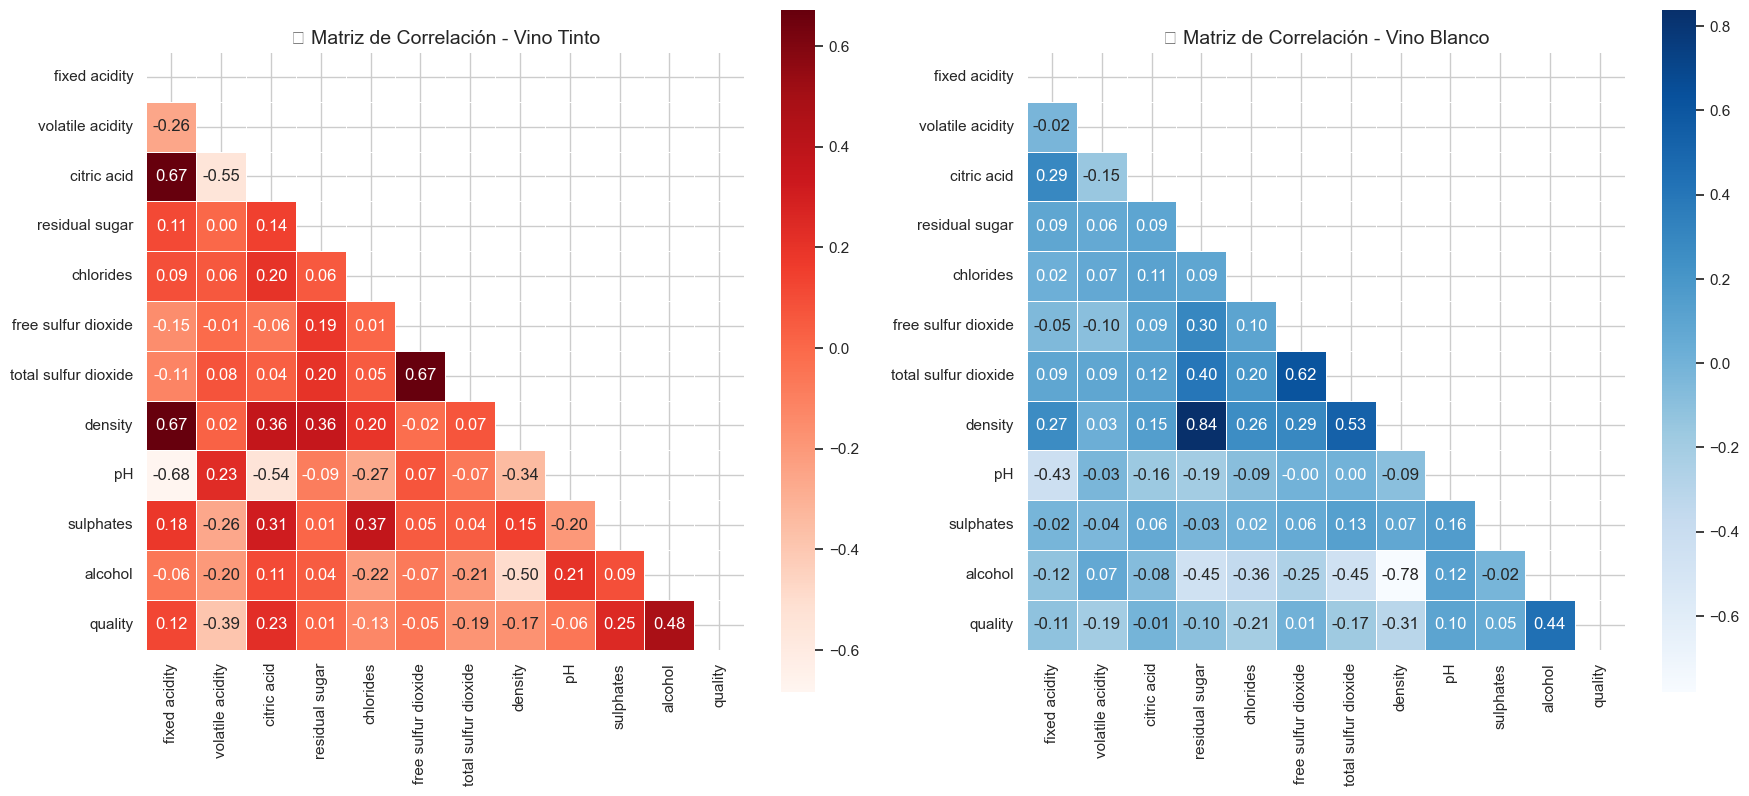

In [53]:
# Configuración del estilo
sns.set_theme(style="whitegrid")

# Crear matrices de correlación excluyendo "wine_type"
corr_red = df_red.drop(columns=["wine_type"]).corr()
corr_white = df_white.drop(columns=["wine_type"]).corr()

# Crear la máscara superior
mask = np.triu(np.ones_like(corr_red, dtype=bool))

# Crear subgráficos para comparar ambas correlaciones
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap para vinos tintos
sns.heatmap(corr_red, mask=mask, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5, square=True, ax=axes[0])
axes[0].set_title("📊 Matriz de Correlación - Vino Tinto", fontsize=14)

# Heatmap para vinos blancos
sns.heatmap(corr_white, mask=mask, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, square=True, ax=axes[1])
axes[1].set_title("📊 Matriz de Correlación - Vino Blanco", fontsize=14)

# Ajustar diseño
plt.tight_layout()
plt.show()